# Batch rename the fields of a shapefile
---

## Aim
The aim is to rename multiple fields in a shapefile table in one loop (unlike ArcMap, where fields have to be renamed one by one).

## Parameters
* Input shapefile
* A textfile that stores the old and new fieldnames (see below).

## CODE

In [1]:
import geopandas as gpd
import pandas as pd
import fiona
import tkinter.filedialog as tkfd
import tkinter.simpledialog as tksd
import matplotlib.pyplot as plt
%matplotlib inline

### Step 1
Import shapefile, with the 'to be converted' fieldnames/columnnames.

In [2]:
input_shapefile = tkfd.askopenfilename(title = "Select input shapefile", 
                                       initialdir = "C:/", 
                                       filetypes = (("shapefile", "*.shp"),("all files", "*.*")))

In [3]:
shapefile = gpd.read_file(input_shapefile)

**EXAMPLE**
Let's have a look at the example shapefile.

In [4]:
shapefile.head()

,A,B,C,D,Id,K,L,M,N,Sample,geometry
0,1,12,0,2,1,58,3,6,9,12,POINT (51733.56446929721 185566.2300957716)
1,0,2,3,5,2,6,8,1,0,15,POINT (78627.49070676332 206613.6506294408)
2,42,52,32,36,3,56,65,12,36,16,POINT (97102.44873076177 179719.7243919747)
3,4,58,95,2,4,6,0,2,1,22,POINT (85175.57709501592 174107.0789163296)
4,22,11,0,22,5,22,11,2,33,25,POINT (79329.07139121895 189541.8539743536)


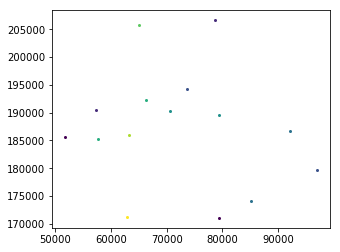

In [5]:
shapefile.plot()

### Step 2
Locate and read the textfile (.txt) that includes the old fieldnames and the new fieldnames. 

The file is structured as follows (:
>* header = None, delimiter = ";", lineterminator = "\n" 
>* old_fieldname_1;new_fieldname_1
>* old_fieldname_2;new_fieldname_2
>* ...

In [6]:
info_file = tkfd.askopenfilename(title = "Select textfile", 
                                 initialdir = "C:/", 
                                 filetypes = (("textfile", "*.txt"),("all files", "*.*")))

In [7]:
mapping = pd.read_csv(info_file, 
                      delimiter = ";", 
                      lineterminator = "\n", 
                      header = None)

**EXAMPLE**

A quick look at the example textfile with old and new fieldnames.

NOTES:
* There are more fieldnames in the textfile (e.g. F;Fig, G;Grape and K;Kiwi) then there are in the shapefile. 
* Only matching names will be changed. Non-matching names will be skipped.

In [8]:
mapping

,0,1
0,A,Apricot
1,B,Banana
2,C,Cherry
3,D,Date
4,E,Elderberry
5,F,Fig
6,G,Grape
7,K,Kiwi
8,L,Lemon
9,M,Mango


### Step 3
Columnnames 'from' (old fieldnames) and 'to' (new fieldnames) are assigned to the columns in the textfile.

In [9]:
mapping.columns = ('from', 'to')

**EXAMPLE**

A quick look at the example textfile.

In [10]:
mapping.head()

,from,to
0,A,Apricot
1,B,Banana
2,C,Cherry
3,D,Date
4,E,Elderberry


### Step 4
Create a dictionary which includes with the old fieldnames as index and the new fieldnames as keys.

In [11]:
dict_mapping = mapping.set_index('from').to_dict()['to']

**EXAMPLE**

In [12]:
dict_mapping

{'A': 'Apricot',
 'B': 'Banana',
 'C': 'Cherry',
 'D': 'Date',
 'E': 'Elderberry',
 'F': 'Fig',
 'G': 'Grape',
 'K': 'Kiwi',
 'L': 'Lemon',
 'M': 'Mango',
 'N': 'Nectarine'}

### Step 5
Run a for loop to replace the old fieldnames by the new fieldnames, and assign the new fieldnames as column headers (fieldnames) in the shapefile.

In [13]:
new_names = []
for name in shapefile.columns:
    if name in dict_mapping.keys():
        new_names.append(dict_mapping[name])
    else:
        new_names.append(name)

In [14]:
shapefile.columns = new_names

**EXAMPLE**

The example shapefile with new field/column names.

NOTE
* Only the fieldnames included in the textfile have been changed, the other fields (e.g. sample, id) remained untouched and are still in the shapefile.

In [15]:
shapefile.head()

,Apricot,Banana,Cherry,Date,Id,Kiwi,Lemon,Mango,Nectarine,Sample,geometry
0,1,12,0,2,1,58,3,6,9,12,POINT (51733.56446929721 185566.2300957716)
1,0,2,3,5,2,6,8,1,0,15,POINT (78627.49070676332 206613.6506294408)
2,42,52,32,36,3,56,65,12,36,16,POINT (97102.44873076177 179719.7243919747)
3,4,58,95,2,4,6,0,2,1,22,POINT (85175.57709501592 174107.0789163296)
4,22,11,0,22,5,22,11,2,33,25,POINT (79329.07139121895 189541.8539743536)


### Step 6
Define the output location and the output filename.shp, and write the shapefile with the new fieldnames to the defined location.

In [16]:
output_shapefile = tkfd.asksaveasfilename(title = "Select output location and define output filename.shp -don't forget .shp!-", 
                                          initialdir = "C:/", 
                                          filetypes = (("shapefile", ".shp"), ("all types", "*.*")))

In [17]:
shapefile.to_file(output_shapefile)